## Step 1: Load and preprocess the dataset
* Load the Spotify top hits dataset using a library such as Pandas.
* Drop any columns that are not relevant to the analysis (such as 'artist', 'duration_ms', 'key', 'mode', 'tempo', 'genre').
* Check for and handle any missing or inconsistent data (such as NaN values).

## Step 2: Scale the features
* Standardize the numerical features to ensure that they are on the same scale
* This can be done using a library such as scikit-learn's StandardScaler.

## Step 3: Determine the optimal number of clusters
* Use a clustering performance metric such as the elbow method or the silhouette score to determine the optimal number of clusters.

## Step 4: Train the K-means model
* Train the K-means model using scikit-learn's KMeans algorithm.
* Set the number of clusters to the optimal value determined in Step 3.
* Fit the model to the preprocessed dataset.

## Step 5: Analyze the results
* Examine the resulting clusters to gain insights into the data.
* Visualize the clusters using scatterplots or other visualization tools.
* Determine the feature importance by looking at the centroid values for each cluster.

In [72]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [73]:
# Load the Spotify top hits dataset
df = pd.read_csv('music.csv')

# Drop irrelevant columns
df = df.drop(['artist', 'song', 'duration_ms', 'key', 'mode', 'tempo', 'genre'], axis=1)

# Handle missing values
df = df.dropna()

le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])

df.head()

,explicit,year,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0,2000,77,0.751,0.834,-5.444,0.0437,0.3000,0.000018,0.3550,0.894
1,0,1999,79,0.434,0.897,-4.918,0.0488,0.0103,0.000000,0.6120,0.684
2,0,1999,66,0.529,0.496,-9.007,0.0290,0.1730,0.000000,0.2510,0.278
3,0,2000,78,0.551,0.913,-4.063,0.0466,0.0263,0.000013,0.3470,0.544
4,0,2000,65,0.614,0.928,-4.806,0.0516,0.0408,0.001040,0.0845,0.879


In [74]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

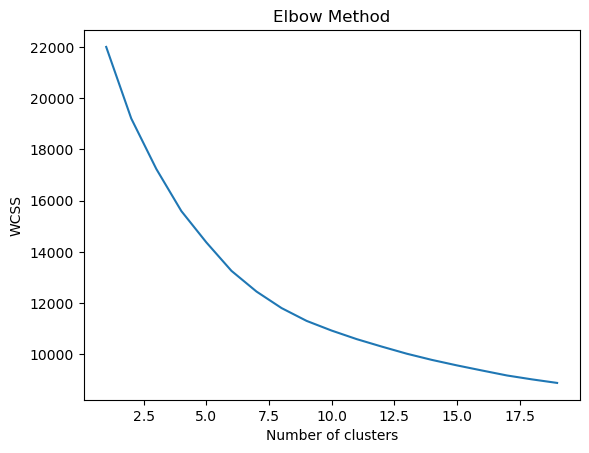

In [75]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
# Train the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=7, random_state=42)

In [77]:
# Analyze the results
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the feature importance
feature_importance = np.mean(centroids, axis=0)
print("Danceability importance: ", feature_importance[0])
print("Energy importance: ", feature_importance[1])
print("Loudness importance: ", feature_importance[2])

Danceability importance:  -0.08017262226744697
Energy importance:  -0.008417584323913874
Loudness importance:  -0.26682231842929455


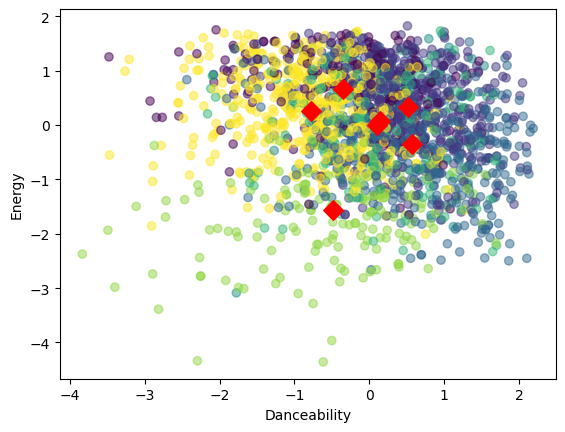

In [83]:
# Visualize the clusters using scatterplots
plt.scatter(df_scaled[:,3], df_scaled[:,4], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 3], centroids[:, 4], c='red', s=100, marker='D')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

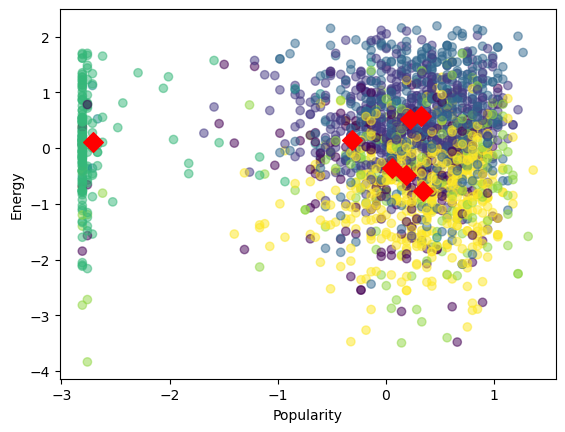

In [81]:
# Visualize the clusters using scatterplots
plt.scatter(df_scaled[:,2], df_scaled[:,4], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 2], centroids[:, 4], c='red', s=100, marker='D')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.show()

In [ ]:
plt.scatter(df_scaled[:,2], df_scaled[:,4], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 2], centroids[:, 4], c='red', s=100, marker='D')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.show()